<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Association Rules**

# Importing Libraries

In [ ]:
#!pip install mlxtend

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

# Importing Dataset

In [ ]:
titanic = pd.read_csv('/content/Association.csv')

In [ ]:
titanic.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [ ]:
titanic.tail()

,Class,Gender,Age,Survived
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes
2200,Crew,Female,Adult,Yes


In [ ]:
titanic['Class'].unique()

array(['3rd', '1st', '2nd', 'Crew'], dtype=object)

In [ ]:
titanic['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
titanic['Age'].unique()

array(['Child', 'Adult'], dtype=object)

In [ ]:
titanic['Survived'].unique()

array(['No', 'Yes'], dtype=object)

# Preprocessing
As the data is not in transaction formation we are using transaction Encoder.

In [ ]:
#one-hot encoding
df = pd.get_dummies(titanic)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,False,False,True,False,False,True,False,True,True,False
1,False,False,True,False,False,True,False,True,True,False
2,False,False,True,False,False,True,False,True,True,False
3,False,False,True,False,False,True,False,True,True,False
4,False,False,True,False,False,True,False,True,True,False


In [ ]:
df = df.replace({False: 0, True: 1})
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


# Apriori algorithm

In [ ]:
#Applying Apriori algorithm to get itemset combinations
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Class_1st, Age_Adult)"


In [ ]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   35 non-null     float64
 1   itemsets  35 non-null     object 
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


In [ ]:
#transactionwise information
rules = association_rules(frequent_itemsets)
rules

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493,0.037128
1,(Class_2nd),(Age_Adult),0.129487,0.950477,0.118582,0.915789,0.963505,-0.004492,0.588085,-0.041697
2,(Class_3rd),(Age_Adult),0.320763,0.950477,0.284871,0.888102,0.934375,-0.020008,0.442572,-0.093712
3,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621,0.322047
4,(Class_Crew),(Age_Adult),0.402090,0.950477,0.402090,1.000000,1.052103,0.019913,inf,0.082827
5,(Gender_Female),(Age_Adult),0.213539,0.950477,0.193094,0.904255,0.951370,-0.009870,0.517240,-0.061028
6,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441,0.061028
7,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187,0.436144
8,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023,0.046906
9,(Survived_Yes),(Age_Adult),0.323035,0.950477,0.297138,0.919831,0.967757,-0.009900,0.617734,-0.046906


In [ ]:
rules.sort_values(by='lift', ascending =False)

#Leverage (-1 to 1), 0 indicates independence
#leverage is a proportion of additional elements covered by both the antecedent and consequence above the expected if independent.

#conviction (0 to inf) higher conviction means consequent is highly dependent on antecedent
#Conviction is a measure of the implication and has value 1 if items are unrelated.

#zhangs_metric is extension of lift (-1 to 1) -> 1:association, -1:disassociation

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,"(Class_Crew, Survived_No)","(Gender_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079,0.344592
15,(Class_Crew),"(Gender_Male, Age_Adult)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480,0.371976
27,"(Class_Crew, Age_Adult, Survived_No)",(Gender_Male),0.305770,0.786461,0.304407,0.995542,1.265851,0.063931,47.903983,0.302519
16,"(Class_Crew, Survived_No)",(Gender_Male),0.305770,0.786461,0.304407,0.995542,1.265851,0.063931,47.903983,0.302519
14,"(Class_Crew, Age_Adult)",(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621,0.322047
3,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621,0.322047
23,"(Class_3rd, Gender_Male, Age_Adult)",(Survived_No),0.209905,0.676965,0.175829,0.837662,1.237379,0.033731,1.989896,0.242806
11,"(Class_3rd, Gender_Male)",(Survived_No),0.231713,0.676965,0.191731,0.827451,1.222295,0.034870,1.872135,0.236717
21,(Survived_No),"(Gender_Male, Age_Adult)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337,0.467023
20,"(Age_Adult, Survived_No)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152,0.429921


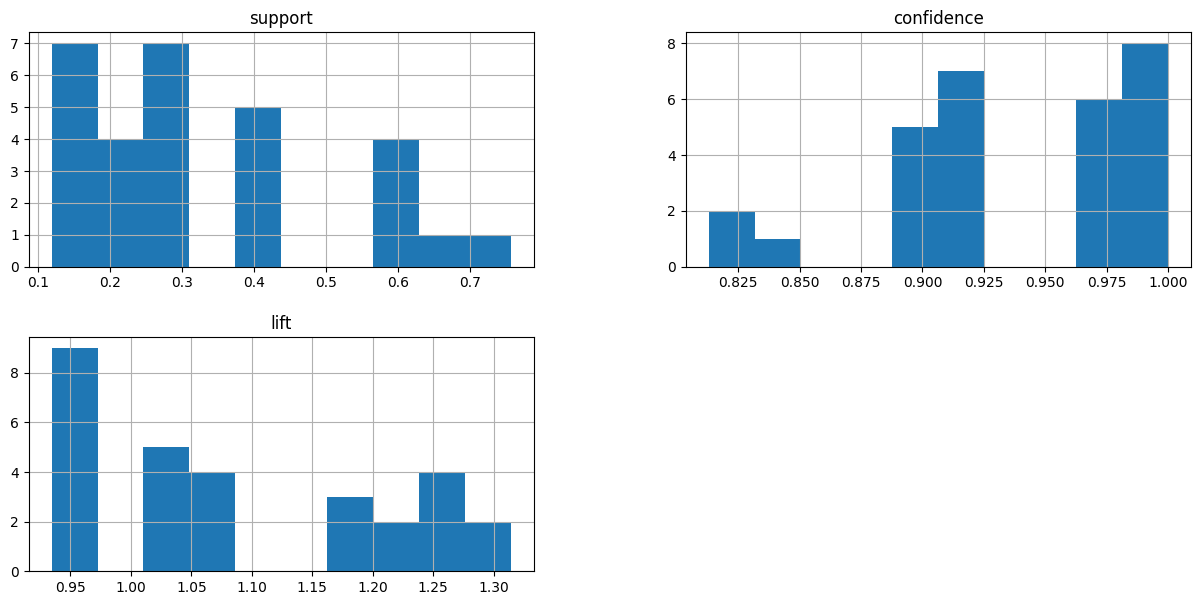

In [ ]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

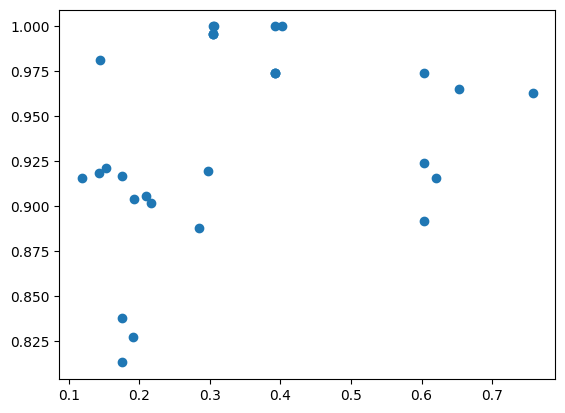

In [ ]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()